# Clustering

In [1]:
import pandas as pd
from utils import load_config

config = load_config('config.yml')
path_dataset = config['dataset']['data']

df = pd.read_csv(path_dataset)
df= df.drop('fullVisitorId', axis=1)
df

,weekend_prop,hour,totals.hits,totals.pageviews,bounce_prop,channelGrouping,device.browser,device.deviceCategory,device.operatingSystem
0,0.000000,22.0,14.0,13.0,0.0,Direct,Chrome,desktop,Windows
1,0.666667,21.0,14.0,11.0,0.0,Direct,Chrome,desktop,Windows
2,0.000000,14.0,12.5,10.5,0.0,Direct,Chrome,desktop,Windows
3,0.000000,20.0,22.0,20.0,0.0,Direct,Chrome,desktop,Windows
4,0.000000,17.0,9.5,9.5,0.0,Direct,Chrome,desktop,Windows
...,...,...,...,...,...,...,...,...,...
9982,0.000000,2.0,17.0,16.0,0.0,Referral,Chrome,desktop,Linux
9983,0.000000,20.0,42.0,30.0,0.0,Referral,Chrome,desktop,Linux
9984,0.000000,2.0,60.0,44.5,0.0,Referral,Chrome,desktop,Linux
9985,0.000000,21.0,37.0,33.0,0.0,Referral,Chrome,desktop,Linux


## Variables transformation

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import category_encoders as ce

categorical_features = ['channelGrouping', 'device.browser', 'device.deviceCategory', 'device.operatingSystem']
numerical_features = ['weekend_prop', 'hour', 'totals.hits', 'totals.pageviews', 'bounce_prop']

# Codificación binaria de las variables categóricas
encoder = ce.BinaryEncoder(cols=categorical_features)
df_encoded = encoder.fit_transform(df[categorical_features])

# Concatenar las variables numéricas y las categóricas codificadas
X = pd.concat([df[numerical_features], df_encoded], axis=1)

# Estandarizar los datos
scaler = StandardScaler()
#X[numerical_features] = scaler.fit_transform(X[numerical_features])
X = scaler.fit_transform(X)
X = pd.DataFrame(X)
X


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.496179,1.233767,-0.441850,-0.317739,-0.522797,-0.241647,-1.639085,0.696935,-0.114842,-0.298885,0.167009,-0.309494,0.279572,-0.502439,-1.465772,1.369530
1,1.755703,1.069359,-0.441850,-0.493007,-0.522797,-0.241647,-1.639085,0.696935,-0.114842,-0.298885,0.167009,-0.309494,0.279572,-0.502439,-1.465772,1.369530
2,-0.496179,-0.081496,-0.538455,-0.536824,-0.522797,-0.241647,-1.639085,0.696935,-0.114842,-0.298885,0.167009,-0.309494,0.279572,-0.502439,-1.465772,1.369530
3,-0.496179,0.904951,0.073377,0.295697,-0.522797,-0.241647,-1.639085,0.696935,-0.114842,-0.298885,0.167009,-0.309494,0.279572,-0.502439,-1.465772,1.369530
4,-0.496179,0.411728,-0.731665,-0.624458,-0.522797,-0.241647,-1.639085,0.696935,-0.114842,-0.298885,0.167009,-0.309494,0.279572,-0.502439,-1.465772,1.369530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,-0.496179,-2.054391,-0.248640,-0.054838,-0.522797,-0.241647,0.610096,0.696935,-0.114842,-0.298885,0.167009,-0.309494,0.279572,1.990289,0.682234,-0.730178
9983,-0.496179,0.904951,1.361444,1.172035,-0.522797,-0.241647,0.610096,0.696935,-0.114842,-0.298885,0.167009,-0.309494,0.279572,1.990289,0.682234,-0.730178
9984,-0.496179,-2.054391,2.520704,2.442725,-0.522797,-0.241647,0.610096,0.696935,-0.114842,-0.298885,0.167009,-0.309494,0.279572,1.990289,0.682234,-0.730178
9985,-0.496179,1.069359,1.039427,1.434936,-0.522797,-0.241647,0.610096,0.696935,-0.114842,-0.298885,0.167009,-0.309494,0.279572,1.990289,0.682234,-0.730178


## Kmeans 

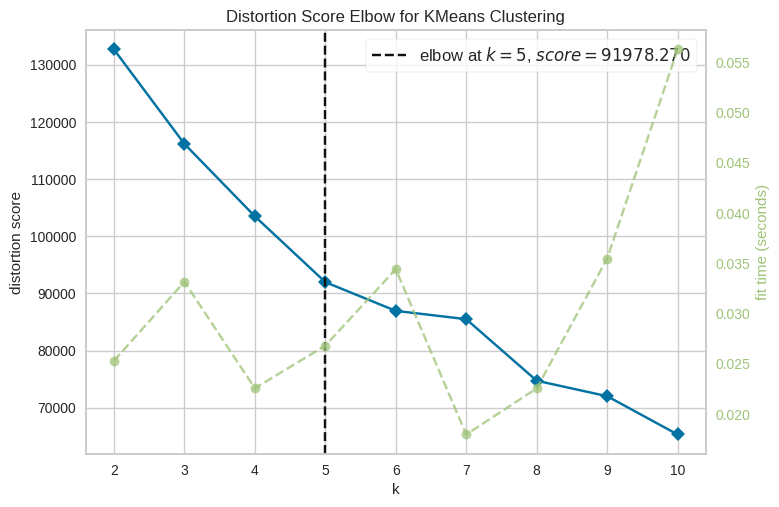

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [3]:
## Método del Codo (Elbow Method)
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,11))
visualizer.fit(X)
visualizer.show()


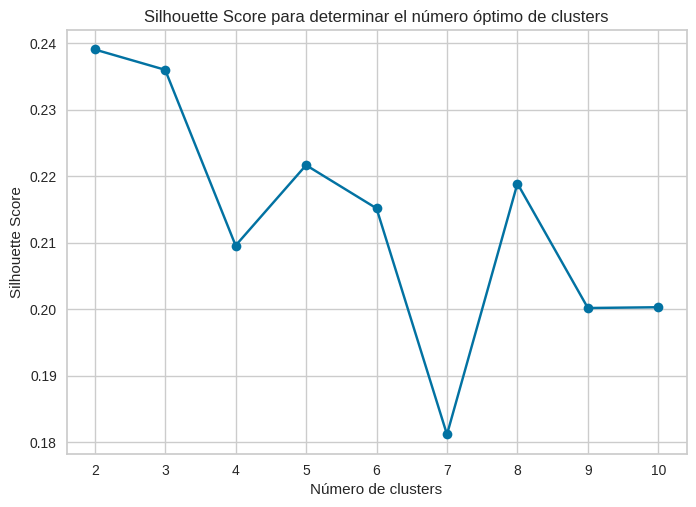

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para determinar el número óptimo de clusters')
plt.show()

In [5]:
import numpy as np
from sklearn.cluster import KMeans

def jaccard_index(clusters1, clusters2):
    n_clusters1 = clusters1.shape[0]
    n_clusters2 = clusters2.shape[0]
    jaccard_matrix = np.zeros((n_clusters1, n_clusters2))
    
    for i in range(n_clusters1):
        for j in range(n_clusters2):
            intersection = np.sum(np.minimum(clusters1[i], clusters2[j]))
            union = np.sum(np.maximum(clusters1[i], clusters2[j]))
            jaccard_matrix[i, j] = intersection / union if union > 0 else 0
    
    return np.max(jaccard_matrix)

def clusterboot(centroids, df_data, K, n_bootstraps=100):
    n_samples = df_data.shape[0]
    jaccard_scores = []
    
    for _ in range(n_bootstraps):
        # Generar una muestra bootstrap
        bootstrap_indices = np.random.choice(np.arange(n_samples), size=n_samples, replace=True)
        bootstrap_data = df_data.iloc[bootstrap_indices]
        
        # Calcular clusters con K-means para la muestra bootstrap
        kmeans_bootstrap = KMeans(n_clusters=K, random_state=0)
        kmeans_bootstrap.fit(bootstrap_data)
        centroids_bootstrap = kmeans_bootstrap.cluster_centers_
        
        # Calcular el índice de Jaccard entre los centroides originales y la muestra bootstrap
        jaccard = jaccard_index(centroids, centroids_bootstrap)
        jaccard_scores.append(jaccard)
    
    return np.mean(jaccard_scores)

In [6]:
# Calcular clusters con K-means y obtener centroides
K = range(2,11)
for k in K: 
    kmeans = KMeans(n_clusters=k, random_state=0)  
    kmeans.fit(X)
    centroids = kmeans.cluster_centers_

    jaccard_scores = clusterboot(centroids, X, k)
    print(f"Índices de Jaccard para k {k}: {jaccard_scores}")

Índices de Jaccard para k 2: -0.290283617583372
Índices de Jaccard para k 3: 0.510042860887787
Índices de Jaccard para k 4: 0.7041034685218094
Índices de Jaccard para k 5: 0.8182269802439192
Índices de Jaccard para k 6: 0.7830181535643759
Índices de Jaccard para k 7: 0.7593334032646953
Índices de Jaccard para k 8: 0.7097903388601664
Índices de Jaccard para k 9: 0.7742495500139965
Índices de Jaccard para k 10: 0.8265300872269057


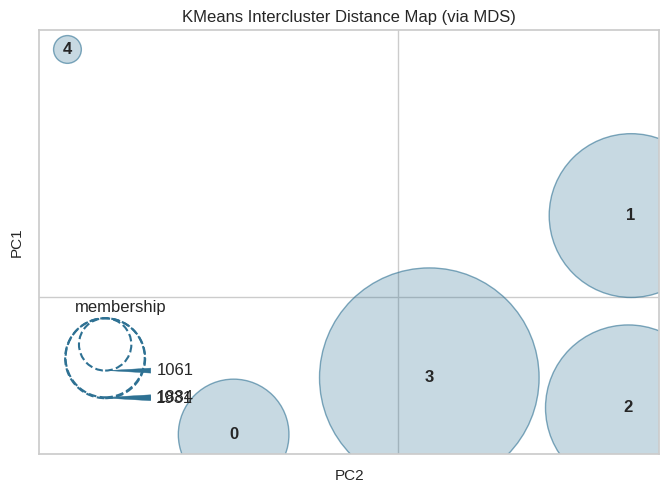

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [7]:
from yellowbrick.cluster import InterclusterDistance

model = KMeans(5)
df['cluster_kmeans'] = model.fit_predict(X)

visualizer = InterclusterDistance(model)
visualizer.fit(X)        
visualizer.show()  

## Analysis 

In [8]:
cluster_summary = df.groupby('cluster_kmeans')[numerical_features].mean()
cluster_summary

,weekend_prop,hour,totals.hits,totals.pageviews,bounce_prop
cluster_kmeans,,,,,
0,0.096652,15.663054,17.990575,14.675306,0.072554
1,0.218007,12.662951,43.787686,33.358280,0.013054
2,0.120546,15.286639,16.032108,13.236406,0.090072
3,0.117080,15.069680,14.237759,11.650777,0.090525
4,0.259116,12.466396,17.742178,14.567787,0.159852


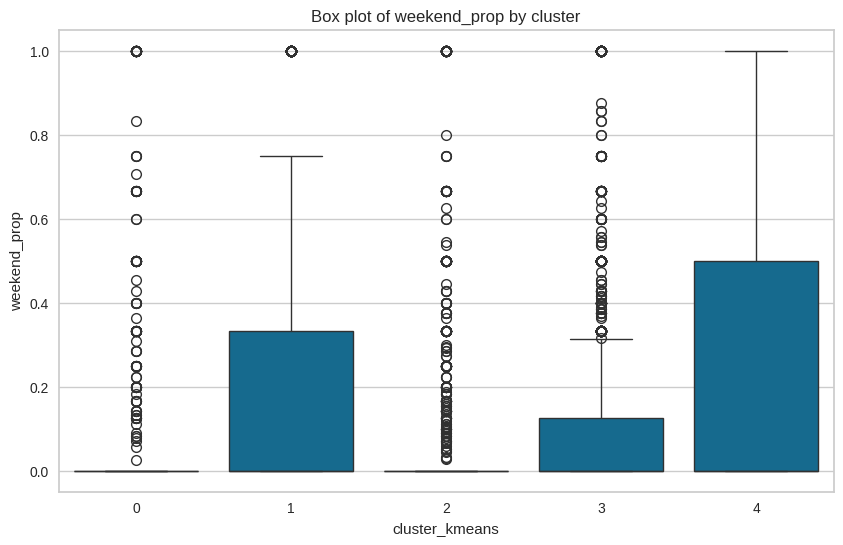

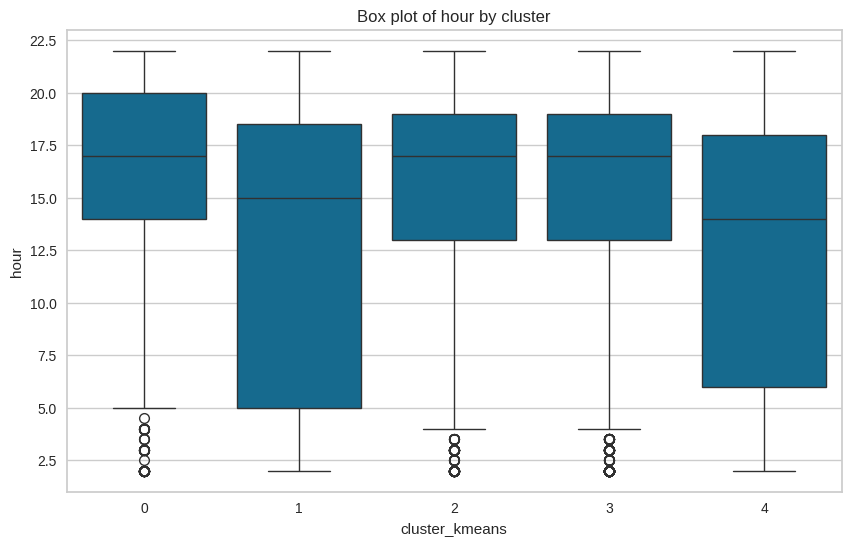

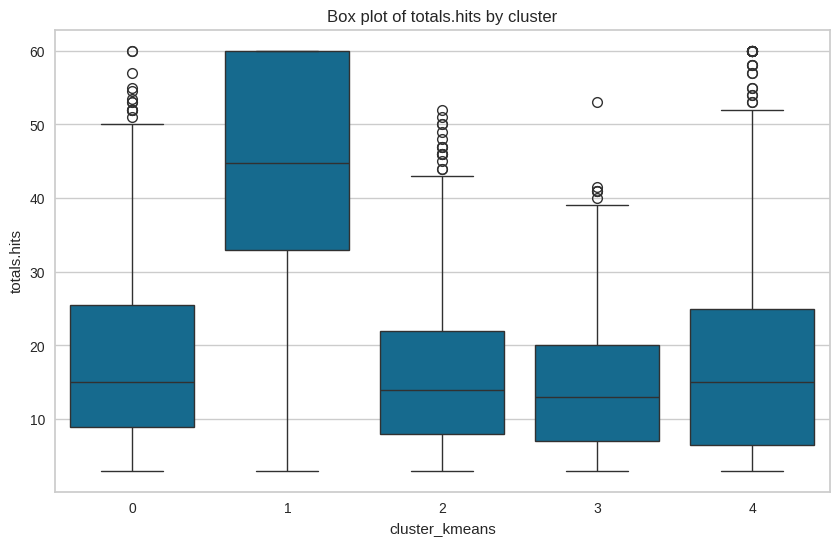

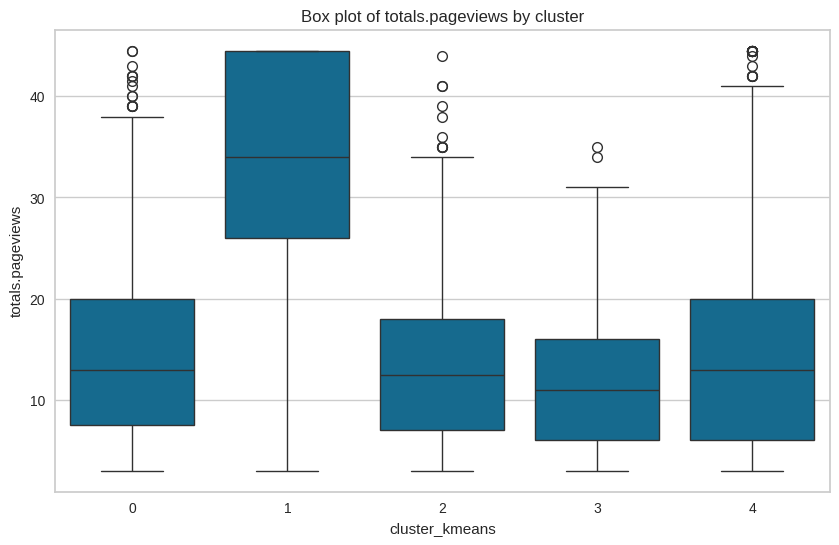

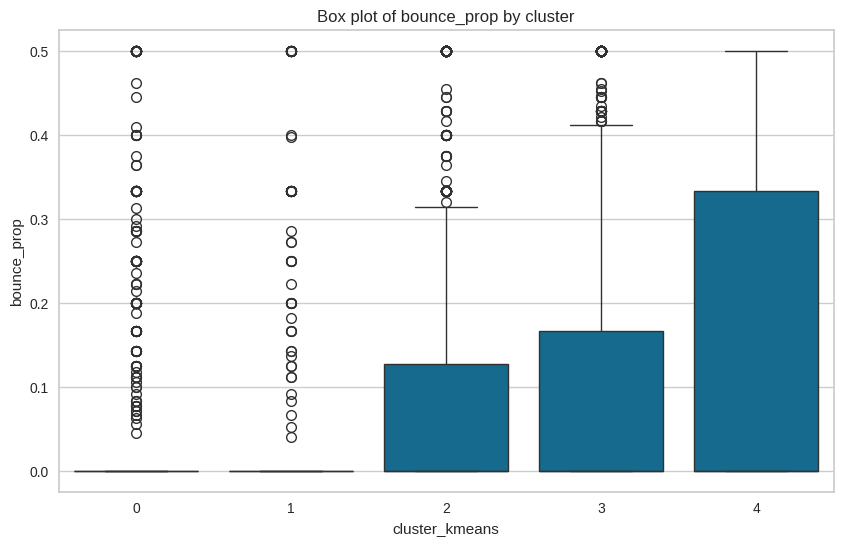

In [9]:
import seaborn as sns

for column in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='cluster_kmeans', y=column, data=df)
    plt.title(f'Box plot of {column} by cluster')
    plt.show()

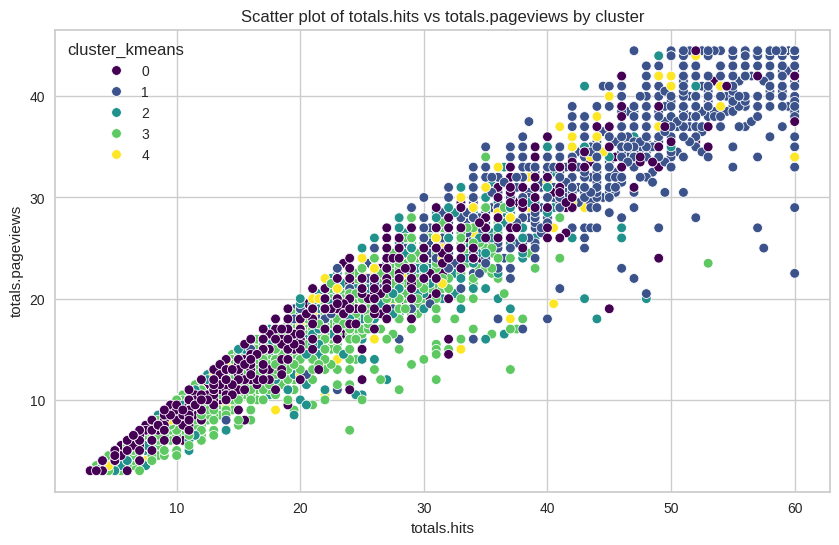

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='totals.hits', y='totals.pageviews', hue='cluster_kmeans', data=df, palette='viridis')
plt.title('Scatter plot of totals.hits vs totals.pageviews by cluster')
plt.show()

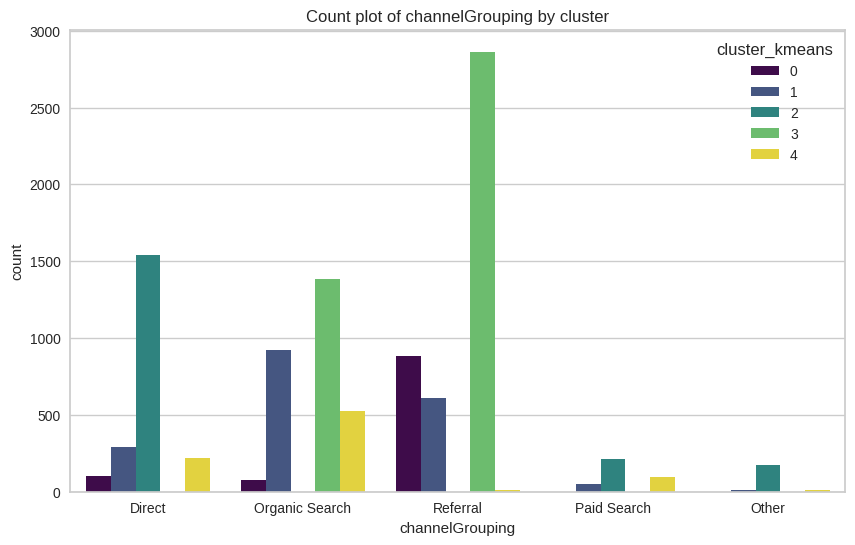

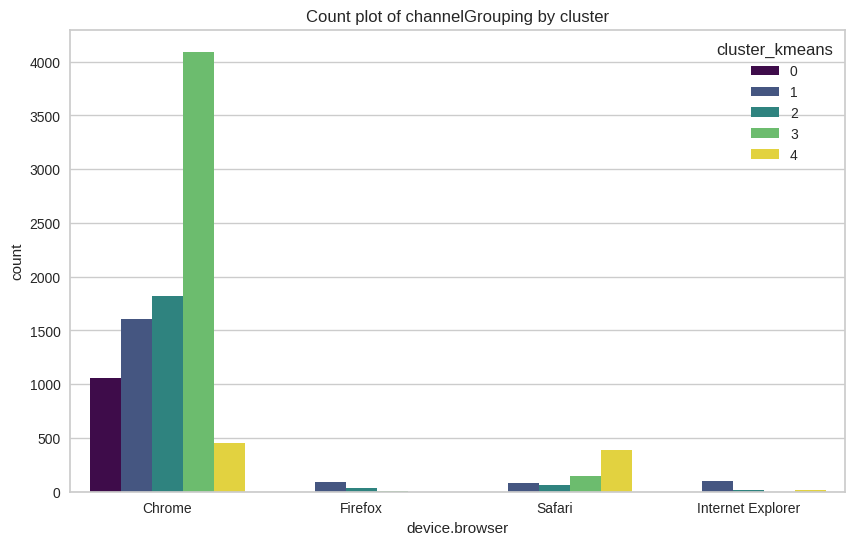

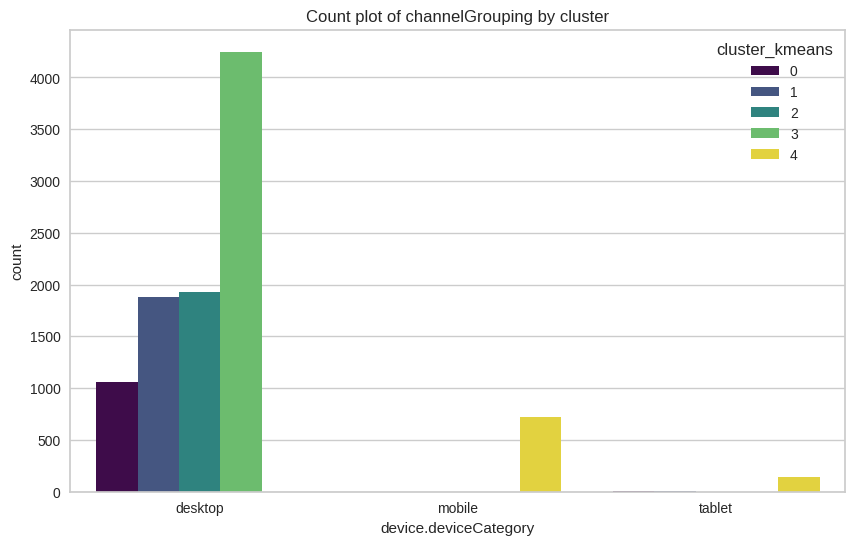

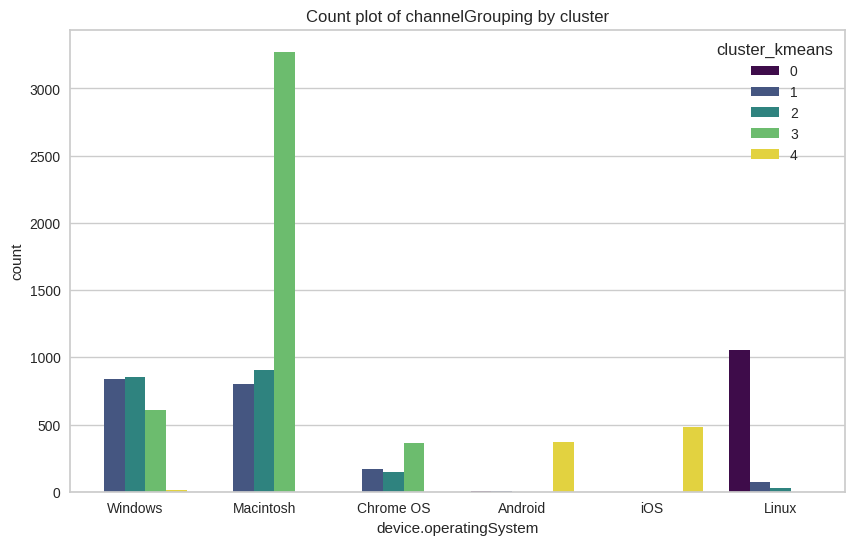

In [16]:
for x in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=x, hue='cluster_kmeans', data=df, palette='viridis')
    plt.title('Count plot of channelGrouping by cluster')
    plt.show()

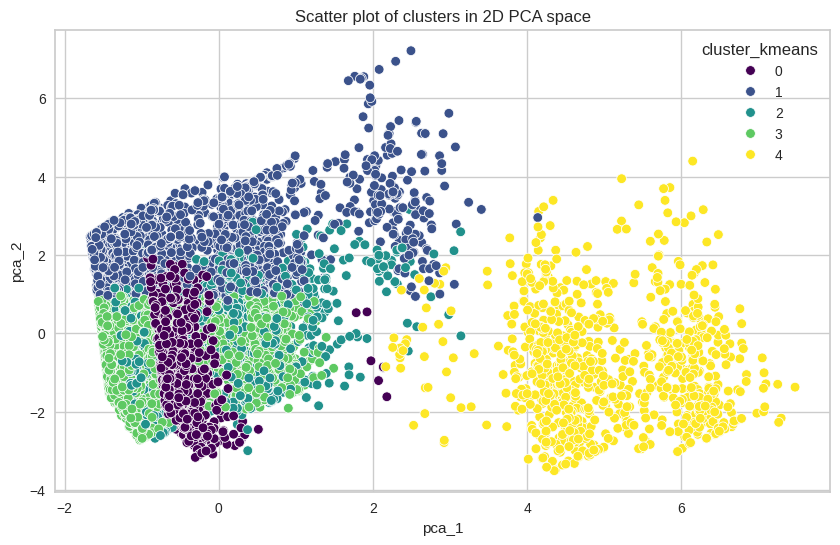

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)
df['pca_1'] = pca_result[:, 0]
df['pca_2'] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca_1', y='pca_2', hue='cluster_kmeans', data=df, palette='viridis')
plt.title('Scatter plot of clusters in 2D PCA space')
plt.show()
